In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot, likert_plot_tab, group_comparison
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "A"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "A"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "A"]

# 3. Auswertung SE
Anmerkung zu Plots (von Tümer): test_hypothesis nutzt halt den Median. Der Plot ist etwas unpräzise, weil er nur die absoluten Werte (0,1,2,3) nimmt. Median von pandas nimmt aber, wenn man genau in der Mitte zwischen zwei Werten steht dann den Mittelwert aus den beiden. Deshalb gibt es in der Gruppe auch Werte wie 2.5. Das ist wichtig für das korrekte testen der Hypothesen. Wenn du jetzt die Balken vom Plot nimmst, fehlen halt die Zwischenwerte.
Deswegen gelten eher die Werte sicher Gruppe1/2 (sicher = safe+almost safe)

### a) Einflussfaktor "Breite der Straße"
Gruppe1: schmale Straße <br>
Gruppe2: breite Straße

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

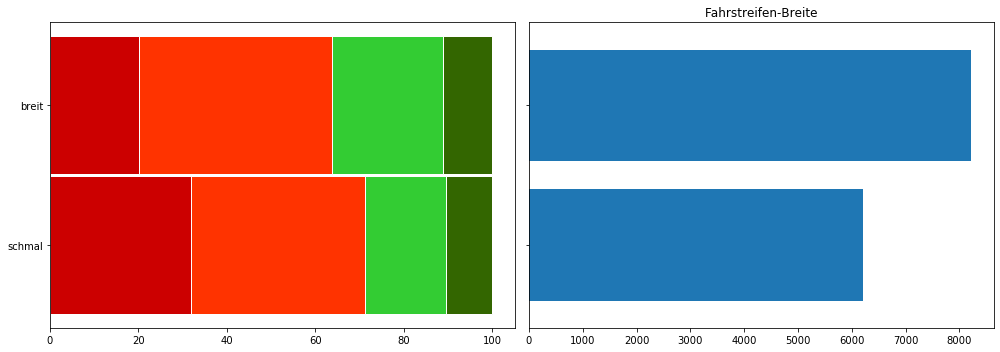

           unsafe  almost_unsafe  almost_safe       safe
group1  31.962331      39.278815    18.319382  10.439472
group2  20.048632      43.610942    25.197568  11.142857
Mittelwert von  schmal - 1.0723599484867998
Mittelwert von  breit - 1.2743465045592706
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -15.850206780480576
Ist der Unterschied signifikant? True
sicher Gruppe 1  27.28589826142949 sicher Gruppe2 34.006079027355625


In [3]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["FS-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Fahrstreifen-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### b) Einflussfaktor "Parken"

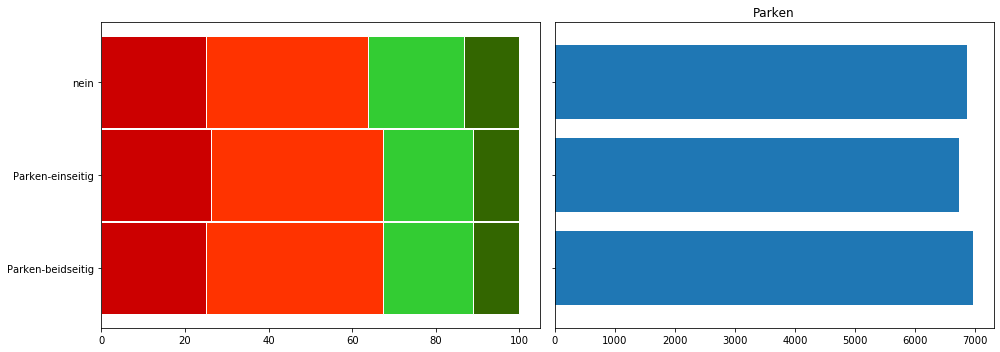

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  25.075442      42.290559    21.454232  11.179767
Parken-einseitig   26.337693      41.141498    21.313912  11.206897
nein               24.974516      38.706859    23.023154  13.295471


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [4]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot


#### b1) Einflussfaktor "Parken"<br> nur schmale Straße

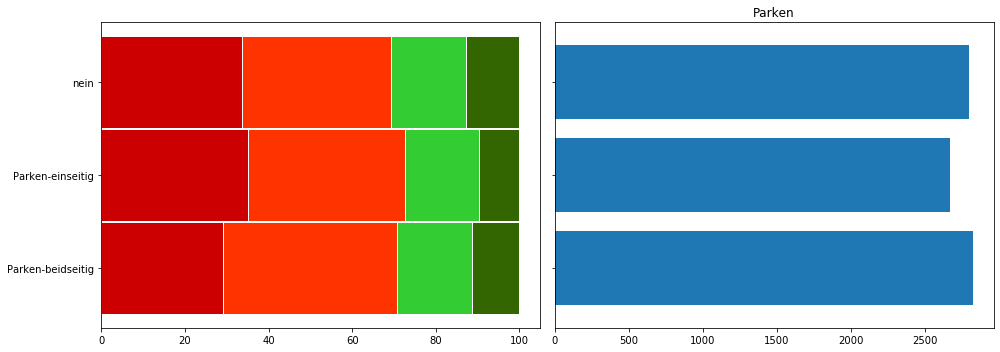

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  29.128278      41.672573    17.930546  11.268604
Parken-einseitig   35.080494      37.551479    17.708723   9.659304
nein               33.619456      35.765379    17.846924  12.768240


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [5]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "schmal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot

#### b2) Einflussfaktor "Parken"<br> nur breite Straße

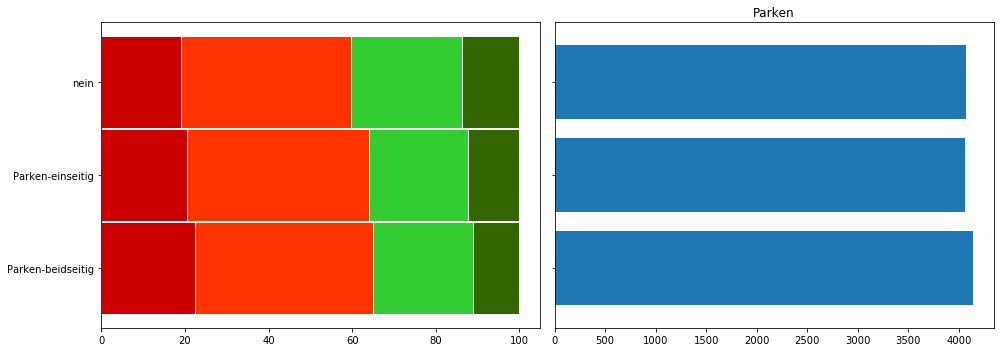

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  22.310853      42.712110    23.857868  11.119168
Parken-einseitig   20.581711      43.505053    23.687454  12.225783
nein               19.037092      40.727094    26.578236  13.657578


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [6]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "breit")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot

### c) Einflussfaktor "Einbahnstraße"

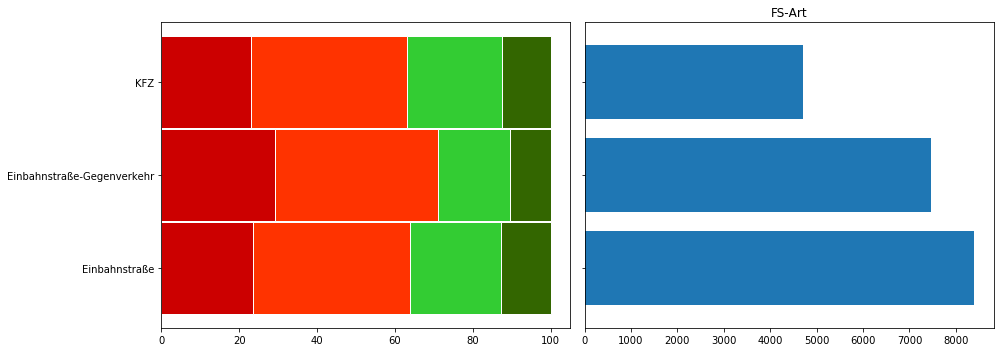

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               23.528711      40.183464    23.540624  12.747200
Einbahnstraße-Gegenverkehr  29.189551      41.714668    18.633624  10.462157
KFZ                         22.960596      40.085197    24.302449  12.651757


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [7]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

#### c1) Einflussfaktor "Einbahnstraße"<br> nur schmale Straße

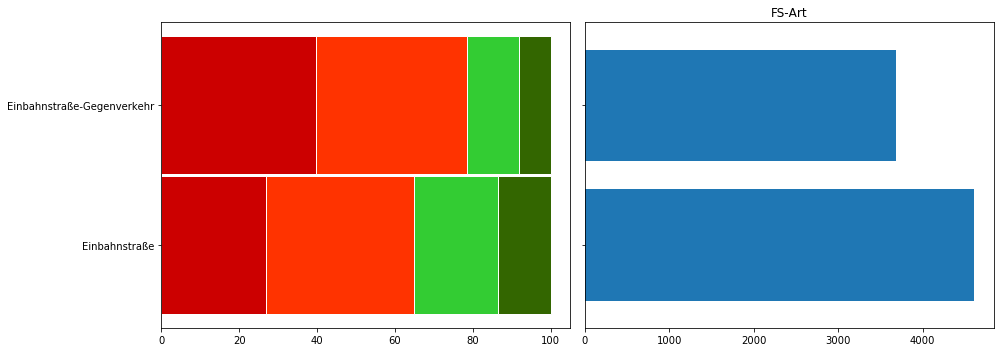

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               26.822917      38.064236    21.484375  13.628472
Einbahnstraße-Gegenverkehr  39.744635      38.712306    13.257267   8.285792


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [8]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "schmal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

#### c2) Einflussfaktor "Einbahnstraße"<br> nur breite Straße

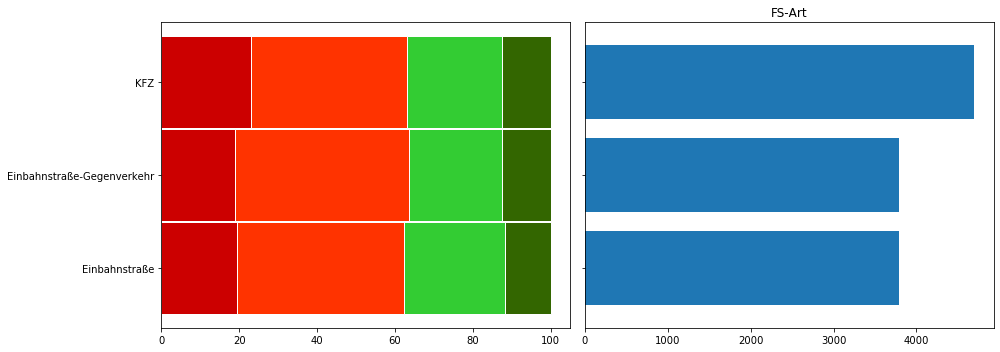

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               19.519282      42.762810    26.043317  11.674591
Einbahnstraße-Gegenverkehr  18.921776      44.635307    23.863636  12.579281
KFZ                         22.960596      40.085197    24.302449  12.651757


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [9]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "breit")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

### d) Einflussfaktor "Markierung"

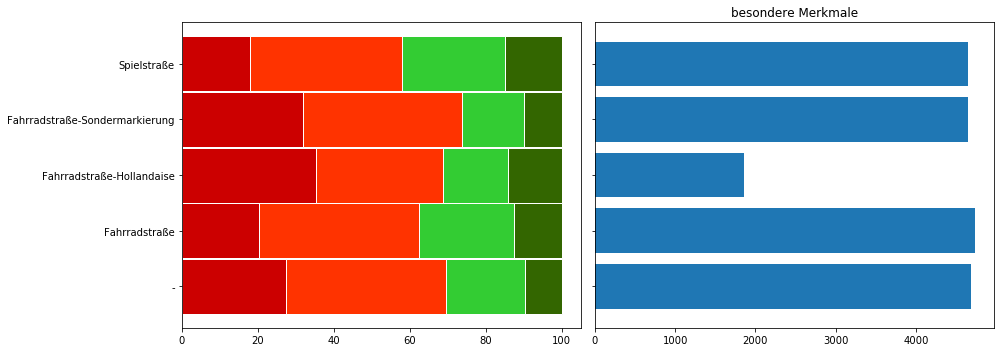

                                   unsafe  almost_unsafe  almost_safe  \
-                               27.461029      42.024343    21.012172   
Fahrradstraße                   20.452623      41.920474    25.042301   
Fahrradstraße-Hollandaise       35.490831      33.279396    17.152104   
Fahrradstraße-Sondermarkierung  31.926803      41.916039    16.340151   
Spielstraße                     18.044789      39.944014    27.196382   

                                     safe  
-                                9.502456  
Fahrradstraße                   12.584602  
Fahrradstraße-Hollandaise       14.077670  
Fahrradstraße-Sondermarkierung   9.817008  
Spielstraße                     14.814815  


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [10]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["besondere Merkmale","rating"]])
likert_plot

#### d1) Einflussfaktor "Markierung" <br> autofrei

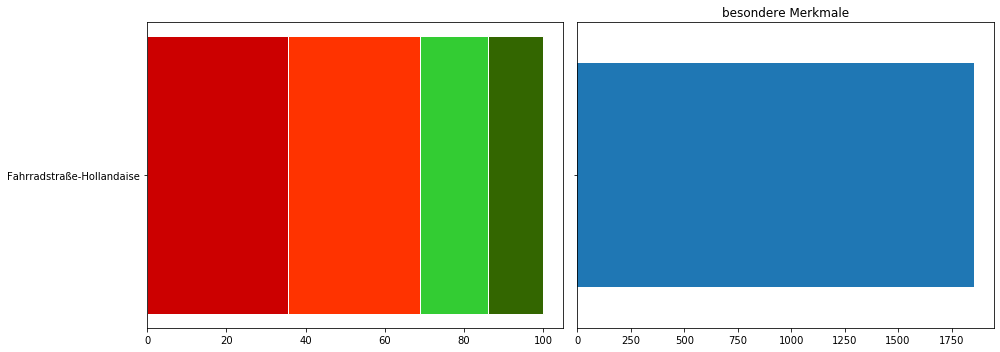

                              unsafe  almost_unsafe  almost_safe      safe
Fahrradstraße-Hollandaise  35.490831      33.279396    17.152104  14.07767


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [11]:
df = bike_data["se"]
df = df[(df["Verkehrsaufkommen"] == "autofrei")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["besondere Merkmale","rating"]])
likert_plot